Réalisé par : - Marc_Olivier POKAM
              - Abdourahmane BAH
              - Mohammed Issam KASSEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from google.colab.patches import cv2_imshow

le code dans la cellule suivante est relatif aux parties 1,2,3 et 4 où on a défini l'architecture du réseau sans faire appel aux fonctions "convolution" et "fc"

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
> Entrainement 0
  train: 0.595
  test : 0.5939999
> Entrainement 1
  train: 0.52708334
  test : 0.5247
> Entrainement 2
  train: 0.62021667
  test : 0.62250006
> Entrainement 3
  train: 0.6588
  test : 0.667
> Entrainement 4
  train: 0.68125
  test : 0.6892
> Entrainement 5
  train: 0.6966167
  test : 0.7051
> Entrainement 6
  train: 0.70701665
  test : 0.71819997
> Entrainement 7
  train: 0.71525
  test : 0.72720003
> Entrainement 8
  train: 0.72080004
  test : 0.734
> Entrainement 9
  train: 0.7260834
  test : 0.7406


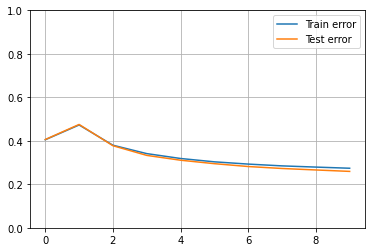

image 0
sortie du réseau: [0.001 0.000 0.006 0.897 0.812 0.000 0.008 1.000 0.811 0.997] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
image 1
sortie du réseau: [0.611 0.451 0.999 0.994 0.004 0.970 0.651 0.000 0.810 0.638] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
image 2
sortie du réseau: [0.000 1.000 0.096 0.071 0.000 0.024 0.549 0.128 0.004 0.017] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
image 3
sortie du réseau: [0.998 0.000 0.662 0.797 0.003 0.143 0.196 0.058 0.832 0.961] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
image 4
sortie du réseau: [0.009 0.000 0.052 0.092 0.969 0.014 0.455 0.048 0.163 0.532] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
image 5
sortie du réseau: [0.000 0.999 0.001 0.011 0.018 0.002 0.007 0.614 0.038 0.986] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0

In [ ]:
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plot
import cv2

taille_batch=100
epoch_nbr=10
learning_rate=0.001
nbr_ni=512

mnist_train_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/train-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_train_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/train-labels.idx1-ubyte", dtype=np.uint8)[8:]]
mnist_test_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_test_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-labels.idx1-ubyte", dtype=np.uint8)[8:]]

ph_images=tf.placeholder(shape=(None, 28, 28, 1), dtype=tf.float32)
ph_labels=tf.placeholder(shape=(None, 10), dtype=tf.float32)

#(..... A COMPLETER AVEC L'ARCHIECTURE DU RESEAU CONVOLUTIF ......)
nbr_noyau12 = 16
nbr_noyau34 = 32
taille_noyau = 5


#1ere couche
couche_prec = ph_images
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.random.truncated_normal(shape=(taille_noyau, taille_noyau, int(couche_prec.shape[-1]), nbr_noyau12)))
# Création des biais en les initialisant à 0
b=np.zeros(nbr_noyau12)
# Définition de l'opération de convolution sur la couche_prec
result_conv=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')
# Ajout du biais
result=result_conv+b
#Fonction d'activation
result = tf.nn.relu(result)


#2eme couche
couche_prec = result
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.random.truncated_normal(shape=(taille_noyau, taille_noyau, int(couche_prec.shape[-1]), nbr_noyau12)))
# Création des biais en les initialisant à 0
b=np.zeros(nbr_noyau12)
# Définition de l'opération de convolution sur la couche_prec
result_conv=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')
# Ajout du biais
result=result_conv+b
#pooling
result = tf.nn.max_pool(value=result,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

#Fonction d'activation
result = tf.nn.relu(result)


#3eme couche
couche_prec = result
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.random.truncated_normal(shape=(taille_noyau, taille_noyau, int(couche_prec.shape[-1]), nbr_noyau34)))
# Création des biais en les initialisant à 0
b=np.zeros(nbr_noyau34)
# Définition de l'opération de convolution sur la couche_prec
result_conv=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')
# Ajout du biais
result=result_conv+b

#Fonction d'activation
result = tf.nn.relu(result)

#4eme couche
couche_prec = result
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.random.truncated_normal(shape=(taille_noyau, taille_noyau, int(couche_prec.shape[-1]), nbr_noyau34)))
# Création des biais en les initialisant à 0
b=np.zeros(nbr_noyau34)
# Définition de l'opération de convolution sur la couche_prec
result_conv=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')
# Ajout du biais
result=result_conv+b
result = tf.nn.max_pool(value=result,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME')
#Fonction d'activation
result = tf.nn.relu(result)

#Applatissement de la dernière couche
result = tf.layers.flatten(result)

#1ere couche FC
couche_prec= result
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.truncated_normal(shape=(int(result.shape[-1]),nbr_ni )), dtype=tf.float32)
# Création des biais en les initialisant à 0
b=tf.Variable(np.zeros(shape=(nbr_ni)), dtype=tf.float32)
# couche FC_1 activé par une fonction sigmoid
sci=tf.matmul(couche_prec, w)+b
result=tf.nn.sigmoid(sci)

#2eme couche FC
couche_prec= result
# Création des pondérations en les initialisant selon une loi normale
w=tf.Variable(tf.truncated_normal(shape=(nbr_ni, 10)), dtype=tf.float32)
# Création des biais en les initialisant à 0
b=tf.Variable(np.zeros(shape=(10)), dtype=tf.float32)
# couche FC_2 activé par une fonction sigmoid
scs=tf.matmul(result, w)+b
result=tf.nn.sigmoid(scs)


# fonction Loss
loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ph_labels, logits=scs)
# métrique de précision
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(result, 1), tf.argmax(ph_labels, 1)), tf.float32))
# ensemble d'apprentissage
#train=tf.train.AdamOptimizer(learning_rate).minimize(loss)
train= tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    tab_train=[]
    tab_test=[]
    
    for id_entrainement in np.arange(epoch_nbr):
      print("> Entrainement", id_entrainement)
      tab_accuracy_train=[]
      tab_accuracy_test=[]
      for batch in np.arange(0, len(mnist_train_images), taille_batch):
          s.run(train, feed_dict={
              ph_images: mnist_train_images[batch:batch+taille_batch],
              ph_labels: mnist_train_labels[batch:batch+taille_batch]
          })
      for batch in np.arange(0, len(mnist_train_images), taille_batch):
          precision=s.run(accuracy, feed_dict={
              ph_images: mnist_train_images[batch:batch+taille_batch],
              ph_labels: mnist_train_labels[batch:batch+taille_batch]
          })
          tab_accuracy_train.append(precision)
      for batch in np.arange(0, len(mnist_test_images), taille_batch):
          precision=s.run(accuracy, feed_dict={
              ph_images: mnist_test_images[batch:batch+taille_batch],
              ph_labels: mnist_test_labels[batch:batch+taille_batch]
          })
          tab_accuracy_test.append(precision)

      print("  train:", np.mean(tab_accuracy_train))
      tab_train.append(1-np.mean(tab_accuracy_train))
      print("  test :", np.mean(tab_accuracy_test))
      tab_test.append(1-np.mean(tab_accuracy_test))

    plot.ylim(0, 1)
    plot.grid()
    plot.plot(tab_train, label="Train error")
    plot.plot(tab_test, label="Test error")
    plot.legend(loc="upper right")
    plot.show()
    
    
    resulat=s.run(result, feed_dict={ph_images: mnist_test_images[0:taille_batch]})
    np.set_printoptions(formatter={'float': '{:0.3f}'.format})
    for image in range(taille_batch):
        print("image", image)
        print("sortie du réseau:", resulat[image], np.argmax(resulat[image]))
        print("sortie attendue :", mnist_test_labels[image], np.argmax(mnist_test_labels[image]))
        #plot.imshow(mnist_test_images[image].reshape(28,28),cmap='gray')
        #plot.show()
        if cv2.waitKey()&0xFF==ord('q'):
            break

courbe d'erreur avec la méthode D'AdamOptimizer


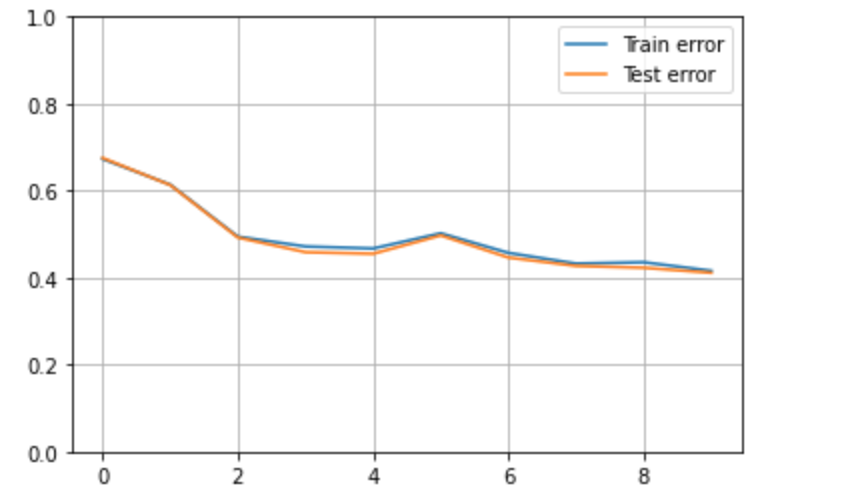

courbe d'erreur avec la méthode Du GradientDescentOptimizer
avec le même nombre d'époch



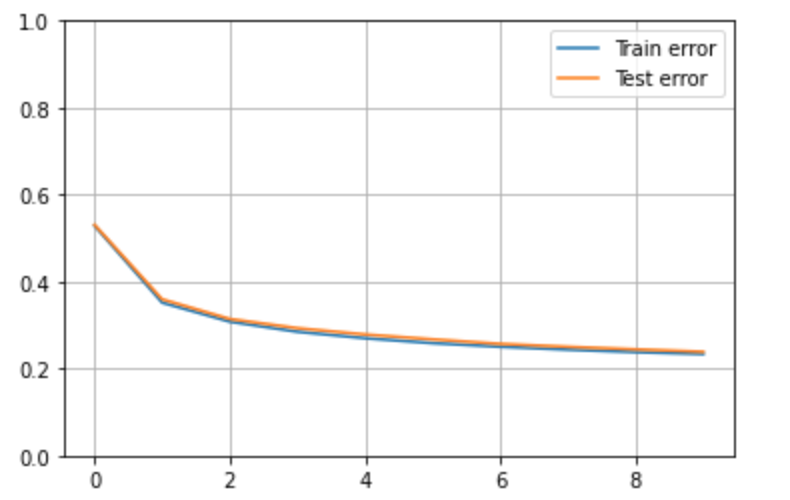

courbe d'erreur avec la méthode Du GradientDescentOptimizer
avec nombre époch=40

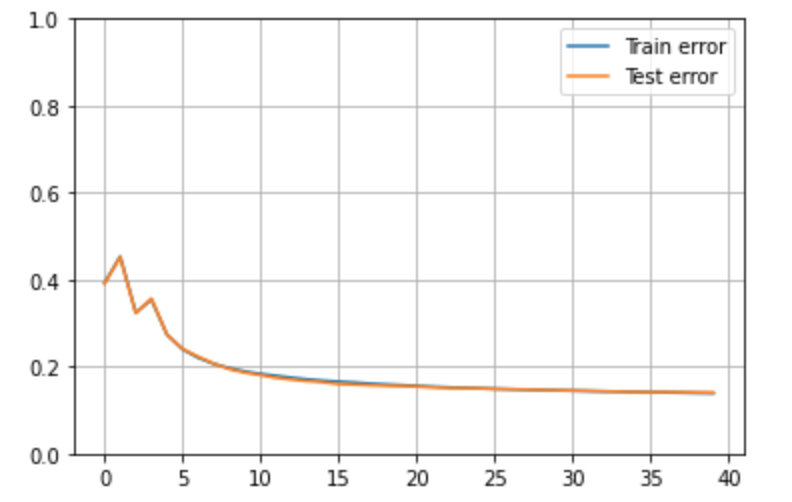

En utilisant le même nombre d'époch, on obtient un meilleur modèle da classification avec la méthode du Gradient Descendant.
En augmentant le nombre d'époch, la courbe d'erreur tend beaucoup plus vers 0.

le code suivant est relatif aux parties 5 et 6. On a allégé le code à travers les fonctions "convolution" et "fc" et on a ajouté les couches de normalisation.

> Entrainement 0
  train: 0.8779834
  test : 0.87810004
> Entrainement 1
  train: 0.91791666
  test : 0.9182
> Entrainement 2
  train: 0.935
  test : 0.9324
> Entrainement 3
  train: 0.94468343
  test : 0.94069993
> Entrainement 4
  train: 0.95166665
  test : 0.94549996
> Entrainement 5
  train: 0.9564333
  test : 0.9494999
> Entrainement 6
  train: 0.96025
  test : 0.953
> Entrainement 7
  train: 0.96308327
  test : 0.956
> Entrainement 8
  train: 0.96565
  test : 0.9572
> Entrainement 9
  train: 0.9677334
  test : 0.95939994


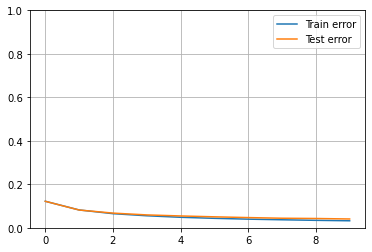

image 0
sortie du réseau: [0.000 0.000 0.001 0.015 0.000 0.000 0.000 1.000 0.002 0.069] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
image 1
sortie du réseau: [0.349 0.881 1.000 0.002 0.001 0.000 0.834 0.000 0.137 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
image 2
sortie du réseau: [0.000 0.965 0.002 0.000 0.001 0.002 0.002 0.000 0.021 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
image 3
sortie du réseau: [1.000 0.000 0.095 0.004 0.000 0.044 0.324 0.000 0.000 0.011] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
image 4
sortie du réseau: [0.003 0.014 0.007 0.000 0.995 0.000 0.001 0.000 0.015 0.305] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
image 5
sortie du réseau: [0.001 0.987 0.001 0.000 0.007 0.000 0.001 0.002 0.017 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0

In [ ]:
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plot
import cv2

taille_batch=100
epoch_nbr=10
learning_rate=0.001
nbr_ni=512

mnist_train_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/train-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_train_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/train-labels.idx1-ubyte", dtype=np.uint8)[8:]]
mnist_test_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_test_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-labels.idx1-ubyte", dtype=np.uint8)[8:]]

ph_images=tf.placeholder(shape=(None, 28, 28, 1), dtype=tf.float32)
ph_labels=tf.placeholder(shape=(None, 10), dtype=tf.float32)

#(..... A COMPLETER AVEC L'ARCHIECTURE DU RESEAU CONVOLUTIF ......)
nbr_noyau12 = 16
nbr_noyau34 = 32
taille_noyau = 5
# fonction de concolution
def convolution(couche_prec, taille_n, nbr_noyau):
  #nouvelle couche
  # Création des pondérations en les initialisant selon une loi normale
  w=tf.Variable(tf.random.truncated_normal(shape=(taille_n, taille_n, int(couche_prec.shape[-1]), nbr_noyau)))
  # Création des biais en les initialisant à 0
  b=np.zeros(nbr_noyau)
  # Définition de l'opération de convolution sur la couche_prec
  result_conv=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')
  # Ajout du biais
  result=result_conv+b
  return result
# fonction de fc
def fc(couche_prec, nbr_neurone):
  #nouvelle couche FC
  # Création des pondérations en les initialisant selon une loi normale
  w=tf.Variable(tf.truncated_normal(shape=(int(couche_prec.shape[-1]),nbr_neurone )), dtype=tf.float32)
  # Création des biais en les initialisant à 0
  b=tf.Variable(np.zeros(shape=(nbr_neurone)), dtype=tf.float32)
  # couche FC_1 activé par une fonction sigmoid
  result=tf.matmul(couche_prec, w)+b
  return result
# fonction de normalisation
def normalisation(couche_prec):
    mean, var=tf.nn.moments(couche_prec, [0])
    scale=tf.Variable(tf.ones(shape=(np.shape(couche_prec)[-1])))
    beta=tf.Variable(tf.zeros(shape=(np.shape(couche_prec)[-1])))
    result=tf.nn.batch_normalization(couche_prec, mean, var, beta, scale, 0.001)
    return result

#1ere couche
result=convolution(ph_images,taille_noyau,nbr_noyau12)
result=normalisation(result)
result = tf.nn.relu(result)
#2eme couche
result=convolution(result,taille_noyau,nbr_noyau12)
#pooling
result = tf.nn.max_pool(value=result,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
result=normalisation(result)
result = tf.nn.relu(result)
#3eme couche
result=convolution(result,taille_noyau,nbr_noyau34)
#pooling
result = tf.nn.max_pool(value=result,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
result=normalisation(result)
result = tf.nn.relu(result)
#4eme couche
result=convolution(result,taille_noyau,nbr_noyau34)
#pooling
result = tf.nn.max_pool(value=result,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
result=normalisation(result)
result = tf.nn.relu(result)

#Applatissement de la dernière couche
result = tf.layers.flatten(result)


#1ere couche FC
result= fc(result, nbr_ni)
result=normalisation(result)
result=tf.nn.sigmoid(result)
#2eme couche FC
scs= fc(result, 10)
result=tf.nn.sigmoid(scs)



# fonction Loss
loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ph_labels, logits=scs)
# métrique de précision
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(result, 1), tf.argmax(ph_labels, 1)), tf.float32))
# ensemble d'apprentissage
#train=tf.train.AdamOptimizer(learning_rate).minimize(loss)
train= tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    tab_train=[]
    tab_test=[]
    
    for id_entrainement in np.arange(epoch_nbr):
      print("> Entrainement", id_entrainement)
      tab_accuracy_train=[]
      tab_accuracy_test=[]
      for batch in np.arange(0, len(mnist_train_images), taille_batch):
          s.run(train, feed_dict={
              ph_images: mnist_train_images[batch:batch+taille_batch],
              ph_labels: mnist_train_labels[batch:batch+taille_batch]
          })
      for batch in np.arange(0, len(mnist_train_images), taille_batch):
          precision=s.run(accuracy, feed_dict={
              ph_images: mnist_train_images[batch:batch+taille_batch],
              ph_labels: mnist_train_labels[batch:batch+taille_batch]
          })
          tab_accuracy_train.append(precision)
      for batch in np.arange(0, len(mnist_test_images), taille_batch):
          precision=s.run(accuracy, feed_dict={
              ph_images: mnist_test_images[batch:batch+taille_batch],
              ph_labels: mnist_test_labels[batch:batch+taille_batch]
          })
          tab_accuracy_test.append(precision)

      print("  train:", np.mean(tab_accuracy_train))
      tab_train.append(1-np.mean(tab_accuracy_train))
      print("  test :", np.mean(tab_accuracy_test))
      tab_test.append(1-np.mean(tab_accuracy_test))

    plot.ylim(0, 1)
    plot.grid()
    plot.plot(tab_train, label="Train error")
    plot.plot(tab_test, label="Test error")
    plot.legend(loc="upper right")
    plot.show()
    
    
    resulat=s.run(result, feed_dict={ph_images: mnist_test_images[0:taille_batch]})
    np.set_printoptions(formatter={'float': '{:0.3f}'.format})
    for image in range(taille_batch):
        print("image", image)
        print("sortie du réseau:", resulat[image], np.argmax(resulat[image]))
        print("sortie attendue :", mnist_test_labels[image], np.argmax(mnist_test_labels[image]))
        #plot.imshow(mnist_test_images[image].reshape(28,28),cmap='gray')
        #plot.show()
        if cv2.waitKey()&0xFF==ord('q'):
            break

courbe d'erreur avec la méthode du GradientDescentOptimizer après normalisation


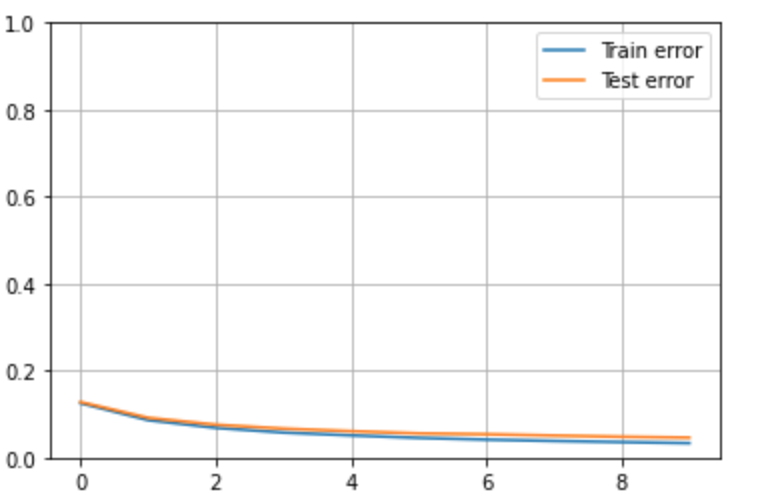

En ajoutant les couches de normalisation on obtient un meilleur résultat. l'erreur tend vers 0 et on n'a pas des fluctuations dans la courbe.

Ce code est relatif aux parties 6bis et 7.on ajoute les lignes pour sauvegarder le modèle

Mounted at /content/drive
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
> Entrainement 0
  train: 0.9632666
  test : 0.16339998
> Entrainement 1
  train: 0.97968334
  test : 0.17810002
> Entrainement 2
  train: 0.9857666
  test : 0.1851
> Entrainement 3
  train: 0.9901166
  test : 0.184
> Entrainement 4
  train: 0.9930666
  test : 0.18750001
> Entrainement 5
  train: 0.99526674
  test : 0.19409999
> Entrainement 6
  train: 0.9970333
  test : 0.19980001
> Entrainement 7
  train: 0.9981
  test : 0.20270002
> Entrainement 8
  train: 0.9985166
  test : 0.21190003
> Entrainement 9
  train: 0.99873334
  test : 0.21279998


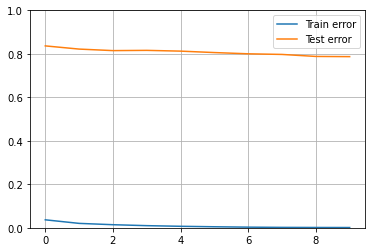

image 0
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 1
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 2
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 3
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 4
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 5
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 6
sortie du réseau: [0.000 0.000 0.000 0.000 0.999 0.000 0.000 0.000 0.001 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 7
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 8
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.999 0.001 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 9
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 10
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 11
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 12
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 13
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 14
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 15
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 16
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 17
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 18
sortie du réseau: [0.000 0.000 0.000 0.937 0.000 0.000 0.000 0.000 0.063 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 19
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 20
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 21
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 22
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 23
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 24
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 25
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 26
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 27
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 28
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 29
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 30
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 31
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 32
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 33
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 34
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 35
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 36
sortie du réseau: [0.000 0.000 0.003 0.000 0.000 0.000 0.000 0.997 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 37
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 38
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 39
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 40
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 41
sortie du réseau: [0.000 0.000 0.026 0.000 0.000 0.000 0.000 0.974 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 42
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 43
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 44
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 45
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 46
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 47
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 48
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 49
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 50
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 51
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 52
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 53
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 54
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 55
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 56
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 57
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 58
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 59
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5
sortie attendue : [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000] 5


image 60
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 61
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 8
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 8


image 62
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.044 0.000 0.002 0.001 0.953] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 63
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 64
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 65
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 66
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 67
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 68
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 69
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 70
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 71
sortie du réseau: [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0
sortie attendue : [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 0


image 72
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 73
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.136 0.864] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 74
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 75
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 76
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 77
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 78
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 79
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 80
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 81
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 82
sortie du réseau: [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2
sortie attendue : [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 2


image 83
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 84
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 8
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 8


image 85
sortie du réseau: [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 86
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 87
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 88
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 89
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 90
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 91
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 92
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


image 93
sortie du réseau: [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3
sortie attendue : [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 3


image 94
sortie du réseau: [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 95
sortie du réseau: [0.000 0.000 0.000 0.000 0.883 0.000 0.004 0.000 0.112 0.000] 4
sortie attendue : [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 4


image 96
sortie du réseau: [0.000 0.908 0.000 0.000 0.003 0.000 0.000 0.000 0.004 0.085] 1
sortie attendue : [0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 1


image 97
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7


image 98
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 6


image 99
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 9


In [ ]:
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plot
#import cv2
import sys
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def normalisation(couche_prec):
    mean, var=tf.nn.moments(couche_prec, [0])
    scale=tf.Variable(tf.ones(shape=(np.shape(couche_prec)[-1])))
    beta=tf.Variable(tf.zeros(shape=(np.shape(couche_prec)[-1])))
    result=tf.nn.batch_normalization(couche_prec, mean, var, beta, scale, 0.001)
    return result


def convolution(couche_prec, taille_noyau, nbr_noyau):
    w=tf.Variable(tf.random.truncated_normal(shape=(taille_noyau, taille_noyau, int(couche_prec.get_shape()[-1]), nbr_noyau)))
    b=np.zeros(nbr_noyau)
    result=tf.nn.conv2d(couche_prec, w, strides=[1, 1, 1, 1], padding='SAME')+b
    return result
        
def fc(couche_prec, nbr_neurone):
    w=tf.Variable(tf.random.truncated_normal(shape=(int(couche_prec.get_shape()[-1]), nbr_neurone), dtype=tf.float32))
    b=tf.Variable(np.zeros(shape=(nbr_neurone)), dtype=tf.float32)
    result=tf.matmul(couche_prec, w)+b
    return result

taille_batch=100
nbr_entrainement=10
learning_rate=0.001
momentum=0.99

mnist_train_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/train-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_train_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/train-labels.idx1-ubyte", dtype=np.uint8)[8:]]
mnist_test_images=np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 28, 28, 1)/255
mnist_test_labels=np.eye(10)[np.fromfile("/content/drive/MyDrive/dataset/mnist/t10k-labels.idx1-ubyte", dtype=np.uint8)[8:]]    

ph_images=tf.placeholder(shape=(None, 28, 28, 1), dtype=tf.float32, name='images')
ph_labels=tf.placeholder(shape=(None, 10), dtype=tf.float32)
ph_is_training=tf.placeholder_with_default(True, (), name='is_training')

result=convolution(ph_images, 5, 16)
result=tf.layers.batch_normalization(result, training=ph_is_training, momentum=momentum)
result=tf.nn.relu(result)
result=convolution(result, 5, 16)
result=tf.layers.batch_normalization(result, training=ph_is_training, momentum=momentum)
result=tf.nn.relu(result)
result=tf.nn.max_pool(result, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

result=convolution(result, 5, 32)
result=tf.layers.batch_normalization(result, training=ph_is_training, momentum=momentum)
result=tf.nn.relu(result)
result=convolution(result, 5, 32)
result=tf.layers.batch_normalization(result, training=ph_is_training, momentum=momentum)
result=tf.nn.relu(result)
result=tf.nn.max_pool(result, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

result=tf.layers.flatten(result)

result=fc(result, 512)
result=tf.layers.batch_normalization(result, training=ph_is_training, momentum=momentum)
result=tf.nn.sigmoid(result)
result=fc(result, 10)
scso=tf.nn.softmax(result,name='sortie')

loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ph_labels, logits=result)
train=tf.train.AdamOptimizer(learning_rate).minimize(loss)
#train=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(scso, 1), tf.argmax(ph_labels, 1)), tf.float32))

# Instanciation de la classe sauvegarde
saver=tf.train.Saver()

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    tab_train=[]
    tab_test=[]
    for id_entrainement in np.arange(nbr_entrainement):
        tab_accuracy_train=[]
        tab_accuracy_test=[]
        print("> Entrainement", id_entrainement)
        for batch in np.arange(0, len(mnist_train_images), taille_batch):
            s.run(train, feed_dict={
                ph_images: mnist_train_images[batch:batch+taille_batch],
                ph_labels: mnist_train_labels[batch:batch+taille_batch],
                ph_is_training : True
            })
        for batch in np.arange(0, len(mnist_train_images), taille_batch):
            precision=s.run(accuracy, feed_dict={
                ph_images: mnist_train_images[batch:batch+taille_batch],
                ph_labels: mnist_train_labels[batch:batch+taille_batch],
                ph_is_training : True
            })
            tab_accuracy_train.append(precision)
        for batch in np.arange(0, len(mnist_test_images), taille_batch):
            precision=s.run(accuracy, feed_dict={
                ph_images: mnist_test_images[batch:batch+taille_batch],
                ph_labels: mnist_test_labels[batch:batch+taille_batch],
                ph_is_training : False
            })
            tab_accuracy_test.append(precision)
        print("  train:", np.mean(tab_accuracy_train))
        tab_train.append(1-np.mean(tab_accuracy_train))
        print("  test :", np.mean(tab_accuracy_test))
        tab_test.append(1-np.mean(tab_accuracy_test))
	
	# sauvegarde du réseau
        saver.save(s,"model_mnist")

    plot.ylim(0, 1)
    plot.grid()
    plot.plot(tab_train, label="Train error")
    plot.plot(tab_test, label="Test error")
    plot.legend(loc="upper right")
    plot.show()
    resulat=s.run(scso, feed_dict={ph_images: mnist_test_images[0:taille_batch]})
    np.set_printoptions(formatter={'float': '{:0.3f}'.format})
    for image in range(taille_batch):
        print("image", image)
        print("sortie du réseau:", resulat[image], np.argmax(resulat[image]))
        print("sortie attendue :", mnist_test_labels[image], np.argmax(mnist_test_labels[image]))
        cv2_imshow(mnist_test_images[image]*255)
        #cv2.waitKey()&0xFF==ord('q'):
        #    break

courbe d'erreur avec la méthode d'AdamOptimizer en modifiant la fonction de normalisation

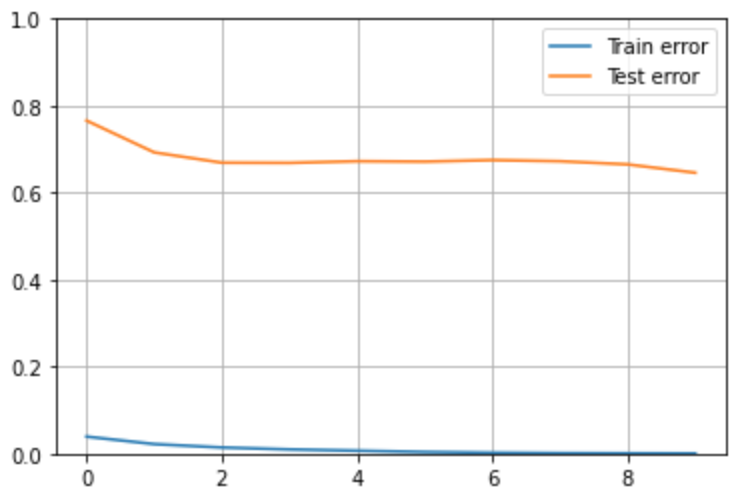

On constate qu'il y a beaucoup d'erreur de classification au niveau des données tests.

exéxution du modèle sauvegardé sur des nouvelles images de chiffres manuscrits.

INFO:tensorflow:Restoring parameters from /content/model_mnist


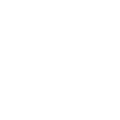

[[0.004 0.005 0.092 0.099 0.053 0.078 0.000 0.060 0.367 0.243]] 8


In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
is_training= True
ph_is_training=tf.placeholder_with_default(True, (), name='is_training')
#cap=cv2.VideoCapture(0)
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
with tf.Session() as s:
    saver=tf.train.import_meta_graph('/content/model_mnist.meta')
    saver.restore(s, tf.train.latest_checkpoint('/content'))
    graph=tf.get_default_graph()
    images=graph.get_tensor_by_name("images:0")
    sortie=graph.get_tensor_by_name("sortie:0")
    is_training=graph.get_tensor_by_name("is_training:0")
    #while True:
    frame=cv2.imread('/content/drive/MyDrive/0-9-Handwritten-5.png')
    test=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    test=cv2.resize(test, (28, 28))
    for x in range(28):
        for y in range(28):
            if test[y][x]<110:
                test[y][x]=1
            else:
                test[y][x]=0         
    cv2_imshow(cv2.resize(test, (120, 120))*255)
    prediction=s.run(sortie, feed_dict={images: [test.reshape(28,28,1)], ph_is_training: False})
    #prediction=s.run(sortie, feed_dict={images: [test.reshape(28, 28, 1)]})
    print(prediction, np.argmax(prediction))
    #if cv2.waitKey(20)&0xFF==ord('q'):
    #    break
#cap.release()
#cv2.destroyAllWindows()



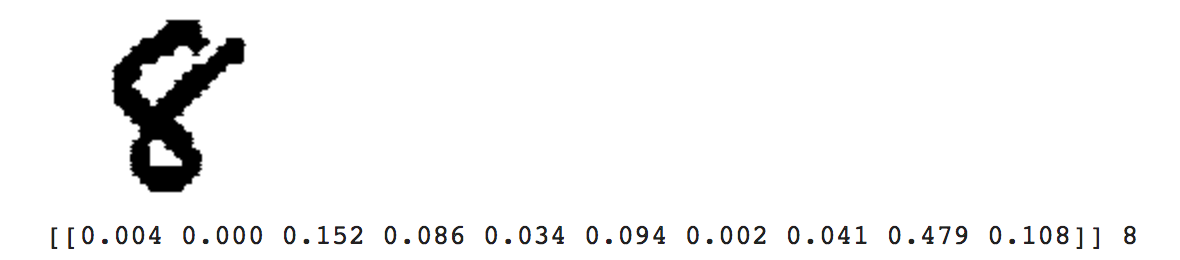

Le modèle calcule la probabilité d'appartenance du chiffre dans l'image d'entrée par rapport aux 10 classes et choisit le max.
Dans cet exemple on obtient une bonne classification de l'image avec le chiffre '8'.
On constate cependant que la classification reste "incertaine", ici avec 0.48 de certitude.
Cela s'explique par le fait qu'on ne prenne pas en compte les biais pour réduire les temps de calcul.